In [1]:
import pandas as pd
import seaborn as sns; sns.set()
import matplotlib.pyplot as plt

In [2]:
df = pd.read_csv("50_Startups.csv")
df.head()

,R&D Spend,Administration,Marketing Spend,State,Profit
0,165349.20,136897.80,471784.10,New York,192261.83
1,162597.70,151377.59,443898.53,California,191792.06
2,153441.51,101145.55,407934.54,Florida,191050.39
3,144372.41,118671.85,383199.62,New York,182901.99
4,142107.34,91391.77,366168.42,Florida,166187.94


## preprocessing

In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50 entries, 0 to 49
Data columns (total 5 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   R&D Spend        50 non-null     float64
 1   Administration   50 non-null     float64
 2   Marketing Spend  50 non-null     float64
 3   State            50 non-null     object 
 4   Profit           50 non-null     float64
dtypes: float64(4), object(1)
memory usage: 2.1+ KB


In [4]:
df.describe().round(3)

,R&D Spend,Administration,Marketing Spend,Profit
count,50.000,50.000,50.000,50.000
mean,73721.616,121344.640,211025.098,112012.639
std,45902.256,28017.803,122290.311,40306.180
min,0.000,51283.140,0.000,14681.400
25%,39936.370,103730.875,129300.132,90138.902
50%,73051.080,122699.795,212716.240,107978.190
75%,101602.800,144842.180,299469.085,139765.977
max,165349.200,182645.560,471784.100,192261.830


***When Seeing min and max on Marketing Spend and R&D Spend We see that there\`s 0 value here must be filled***

In [5]:
df.isnull().sum()

R&D Spend          0
Administration     0
Marketing Spend    0
State              0
Profit             0
dtype: int64

In [6]:
df["State"].value_counts()

California    17
New York      17
Florida       16
Name: State, dtype: int64

***Shuld I delete this columns ?***

*** Let\`s fill the 0\`s values first***

In [7]:
df[df["Marketing Spend"] == 0 ]["Marketing Spend"].value_counts()

0.0    3
Name: Marketing Spend, dtype: int64

In [8]:
df[df["R&D Spend"] == 0 ]["R&D Spend"].value_counts()

0.0    2
Name: R&D Spend, dtype: int64

***Manualy Fill the data***

In [9]:
df.iloc[19] = df["Marketing Spend"].mean()
df.iloc[47] = df["Marketing Spend"].mean()
df.iloc[48] = df["Marketing Spend"].mean()

df.iloc[47] = df["R&D Spend"].mean()
df.iloc[49] = df["R&D Spend"].mean()

In [10]:
df[df["Marketing Spend"] == 0 ]["Marketing Spend"].value_counts()

Series([], Name: Marketing Spend, dtype: int64)

In [11]:
df[df["R&D Spend"] == 0 ]["R&D Spend"].value_counts()

Series([], Name: R&D Spend, dtype: int64)

In [12]:
df.describe()

,R&D Spend,Administration,Marketing Spend,Profit
count,50.000000,50.000000,50.000000,50.000000
mean,83937.706264,124146.605664,222076.962264,119654.136864
std,49888.828149,32737.715116,110484.553719,40262.130452
min,1000.230000,51283.140000,1903.930000,49490.750000
25%,48693.040000,101623.535000,138615.667500,92151.020000
50%,76648.935000,122699.795000,217092.660876,108643.015000
75%,118588.332500,145416.940000,299469.085000,145656.312500
max,219550.511751,219550.511751,471784.100000,219550.511751


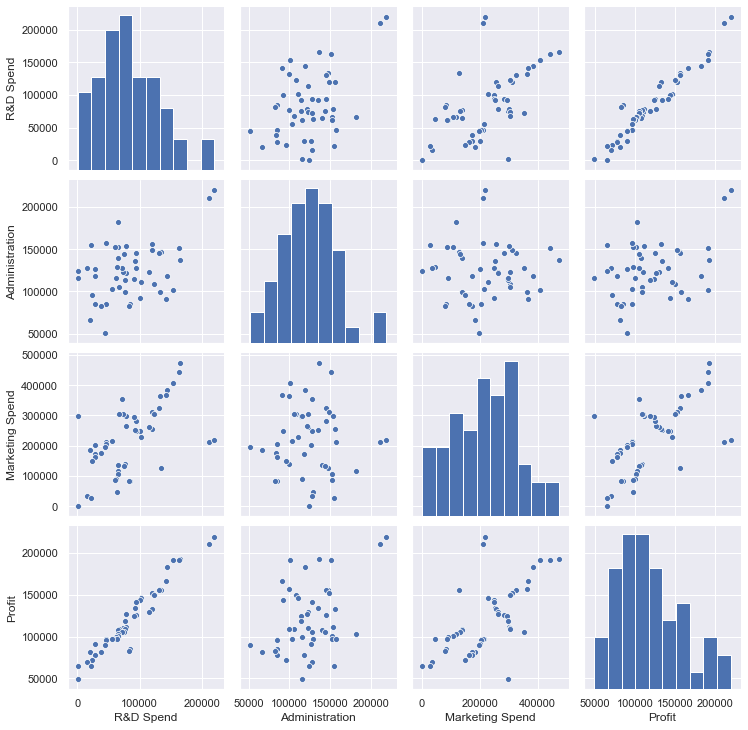

In [13]:
sns.pairplot(df)

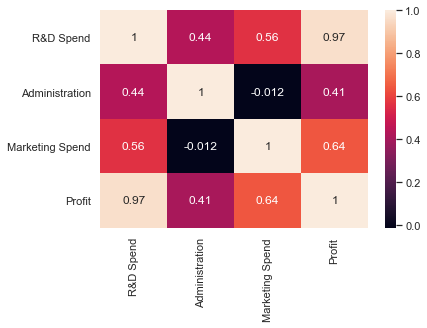

In [14]:
sns.heatmap(df.corr(), annot=True)

In [15]:
# R&D Spend strong correlation with Profit by 0.97
# Administration positive correlation with profit by 0.44
# Marketing Spend positive correlation with profit by 0.56

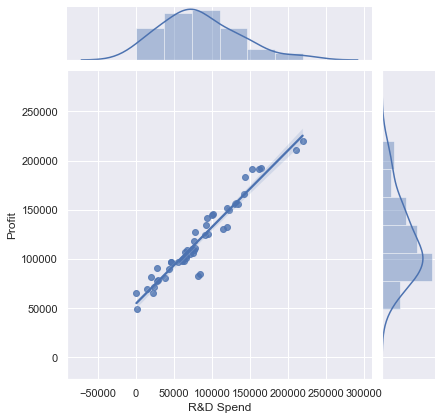

In [34]:
sns.jointplot(df["R&D Spend"], df["Profit"], kind ='reg')
# the data is linear

***Delete unncessary columns***

In [5]:
df.drop(["State"], inplace = True, axis =1)

In [6]:
df.head()

,R&D Spend,Administration,Marketing Spend,Profit
0,165349.20,136897.80,471784.10,192261.83
1,162597.70,151377.59,443898.53,191792.06
2,153441.51,101145.55,407934.54,191050.39
3,144372.41,118671.85,383199.62,182901.99
4,142107.34,91391.77,366168.42,166187.94


## Scale the data

In [7]:
from sklearn.preprocessing import StandardScaler
scale = StandardScaler()
dataframe = scale.fit_transform(df.iloc[:,:-1])

newframe = pd.DataFrame(dataframe)

***Split Data***

In [8]:
X = newframe
y = df["Profit"]
X.shape

(50, 3)

In [9]:
from sklearn.model_selection import train_test_split

x_train, x_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state=20)

In [10]:
print(x_train.shape)
print(x_test.shape)
print(y_train.shape)
print(y_test.shape)

(40, 3)
(10, 3)
(40,)
(10,)


## IMPORT LinearRegression Since the data is linearly correlated

In [11]:
from sklearn.ensemble import RandomForestRegressor 
# --------------------------------------------------
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import mean_squared_error
from sklearn.metrics import median_absolute_error

***Model preditcion***

In [12]:
LR = LinearRegression()
LR.fit(x_train, y_train)
y_prediction = LR.predict(x_test)
print("X-y train model scores are :", LR.score(x_train,y_train))
print("X-y test model scores are :",LR.score(x_test,y_test))

X-y train model scores are : 0.9495702932950282
X-y test model scores are : 0.9483298694845593


In [13]:
# plot prediction

In [14]:
RF = RandomForestRegressor()
RF.fit(x_train, y_train)
y_prediction = RF.predict(x_test)
print("X-y train model scores are :", RF.score(x_train,y_train))
print("X-y test model scores are :",RF.score(x_test,y_test))

X-y train model scores are : 0.9920214807949371
X-y test model scores are : 0.9106054954773992


## Calculate metrics -> Errors

In [15]:
print("mean absolute error is :", mean_absolute_error(y_test, y_prediction))
print("mean squared error is :", mean_squared_error(y_test, y_prediction))
print("median absolute error is :", median_absolute_error(y_test, y_prediction))

mean absolute error is : 10668.503060000006
mean squared error is : 164209983.43746656
median absolute error is : 9510.79260000003


### <Span style="color:Green">Since there are linear correlation between at least one feature, but RandomForest generalized better! </span>

***Save model***

In [16]:
import joblib

joblib.dump(scale, "StandardScaler.h5") # save standard scaler
joblib.dump(LR, "random forest.h5")# save the Linear Regression model
joblib.dump(RF, "random forest.h5")# save Random Forest (best model)
joblib.dump(df.columns, "50 Satartups Columns.h5") # save all data frame`s columns

['50 Satartups Columns.h5']